In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_theme(style='whitegrid')
drivers = ['plaintext', 'emp']
driver_labels = {'plaintext':'#mux', 'emp':'running time (ms)'}

def read_stats(cat, dr, v, n, **kwargs):
    df = pd.read_csv(f'{cat}/test_{v}.{dr}.output.csv', **kwargs)
    df.columns = [n]
    # Convert to milliseconds.
    if dr == 'emp': df /= 1000
    return df

In [2]:
# Load decision tree tests.

views = {'max':'max height', 'height':'exact height', 'spine':'spine', 'spineF':'spine w/ feat.', 'all':'all'}

stats = {}
for dr in drivers:
    df = pd.concat((read_stats('dtree', dr, 'dtree_'+v, n, usecols=['stat']) for (v, n) in views.items()), axis=1)
    df.index = ['small', 'very sparse', 'eighth sparse', 'full']
    stats[dr] = df

In [3]:
stats['plaintext']

,max height,exact height,spine,spine w/ feat.,all
small,10,9,9,1,1
very sparse,655350,589815,144,16,16
eighth sparse,655350,589815,73746,8194,8194
full,655350,589815,589815,65535,65535


In [4]:
stats['emp']

,max height,exact height,spine,spine w/ feat.,all
small,0.664,0.639,0.624,0.532,0.533
very sparse,4806.574,4636.520,2.254,0.731,0.672
eighth sparse,4821.384,4666.233,550.230,63.385,54.477
full,4902.305,4715.462,4681.422,507.898,440.725


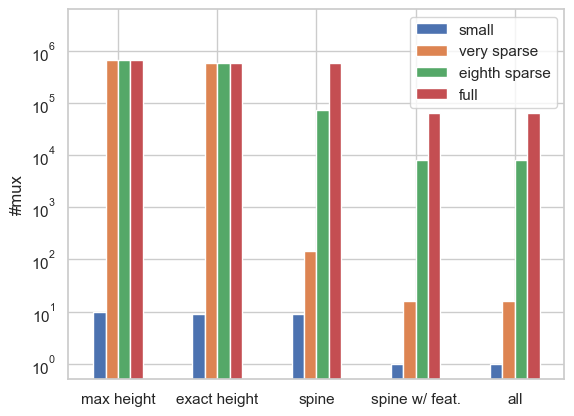

In [5]:
ax = stats['plaintext'].T.plot.bar(logy=True, ylabel=driver_labels['plaintext'], rot=0)
ax.set_ylim(top=10**6.8)
plt.savefig('figs/dtree-plaintext.pdf')

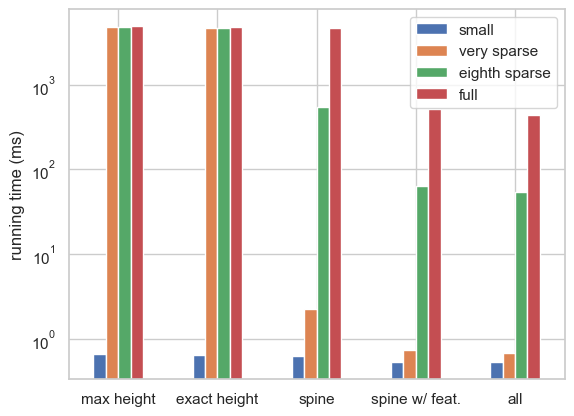

In [6]:
stats['emp'].T.plot.bar(logy=True, ylabel=driver_labels['emp'], rot=0)
plt.savefig('figs/dtree-emp.pdf')

In [7]:
# Keep track of correlations between #mux and the running time.
corrs = {}

In [8]:
# Load tree tests.

tests = {'lookup':'lookup', 'prob':'prob', 'map':'map'}

stats = {}
for dr in drivers:
    stats[dr] = pd.concat((read_stats('tree', dr, v, n, index_col='public') for (v, n) in tests.items()), axis=1)

In [9]:
stats['plaintext']

,lookup,prob,map
public,,,
0,2,1,0
1,8,4,4
2,20,10,18
3,44,22,58
4,92,46,162
5,188,94,418
6,380,190,1026
7,764,382,2434
8,1532,766,5634


In [10]:
stats['emp']

,lookup,prob,map
public,,,
0,0.538,0.487,0.512
1,0.565,0.905,0.557
2,0.686,1.648,0.623
3,0.803,3.008,0.795
4,1.114,4.930,1.254
5,1.703,8.696,2.276
6,2.772,15.344,4.539
7,4.809,28.796,7.945
8,7.915,54.693,16.276


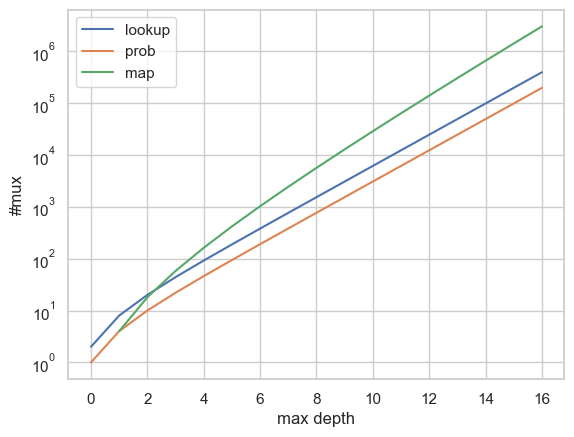

In [11]:
# Remove the first value of map because it is zero which breaks logarithmic scale.
stats['plaintext'].at[0, 'map'] = math.nan
stats['plaintext'].plot.line(xlabel='max depth', ylabel=driver_labels['plaintext'], logy=True)
plt.savefig('figs/tree-plaintext.pdf')

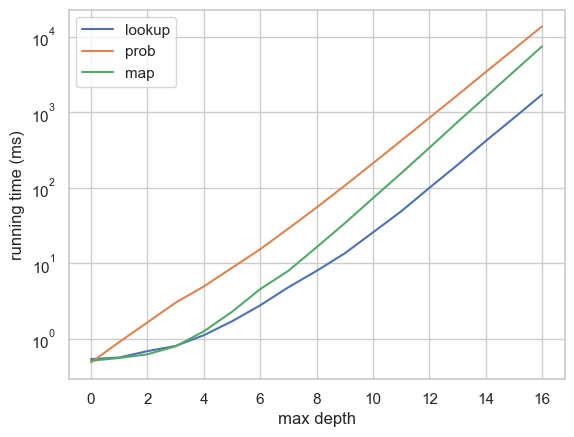

In [12]:
stats['emp'].plot.line(xlabel='max depth', ylabel=driver_labels['emp'], logy=True)
plt.savefig('figs/tree-emp.pdf')

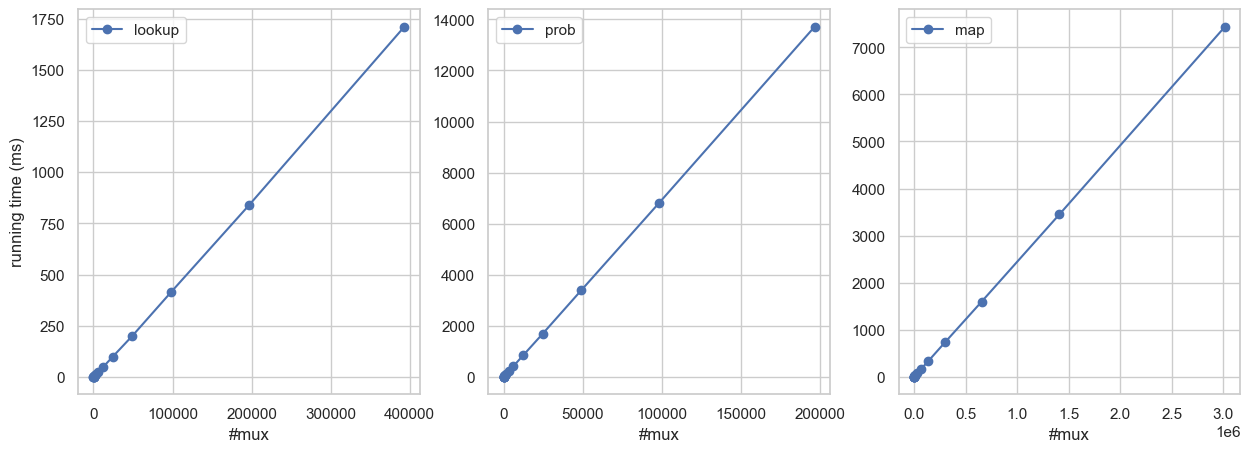

In [13]:
fig, ax = plt.subplots(ncols=len(tests), figsize=(15,5))
ax[0].set_ylabel(driver_labels['emp'])
if 'tree' not in corrs: corrs['tree'] = {}
for i, tst in enumerate(tests.values()):
    df = pd.DataFrame(data={'#mux':stats['plaintext'][tst], tst:stats['emp'][tst]})
    corrs['tree'][tst] = df.corr().iat[0, 1]
    df.plot.line(ax=ax[i], x='#mux', y=tst, xlabel=driver_labels['plaintext'], marker='o')

plt.savefig('figs/tree-mux-corr.pdf')

In [14]:
# Load list tests

tests = {'elem':'elem', 'hamming_distance':'hamming', 'min_euclidean_distance':'euclidean', 'dot_prod':'dot-prod'}

stats = {}
for dr in drivers:
    stats[dr] = pd.concat((read_stats('list', dr, v, n, index_col='public') for (v, n) in tests.items()), axis=1)

In [15]:
stats['plaintext']

,elem,hamming,euclidean,dot-prod
public,,,,
0,1,0,0,0
1,4,3,1,2
2,7,6,3,4
3,10,9,5,6
4,13,12,7,8
5,16,15,9,10
6,19,18,11,12
7,22,21,13,14
8,25,24,15,16


In [16]:
stats['emp']

,elem,hamming,euclidean,dot-prod
public,,,,
0,0.538,0.003,0.002,0.002
1,0.551,0.548,0.633,0.695
2,0.560,0.586,0.789,0.733
3,0.595,0.590,0.901,0.904
4,0.610,0.620,1.042,1.020
5,0.635,0.641,1.169,1.145
6,0.653,0.666,1.275,1.268
7,0.663,0.679,1.390,1.377
8,0.705,0.723,1.514,1.507


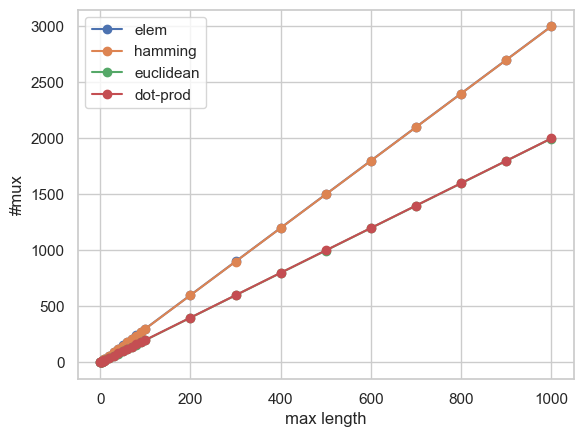

In [17]:
stats['plaintext'].plot.line(xlabel='max length', ylabel=driver_labels['plaintext'], marker='o')
plt.savefig('figs/list-plaintext-1.pdf')

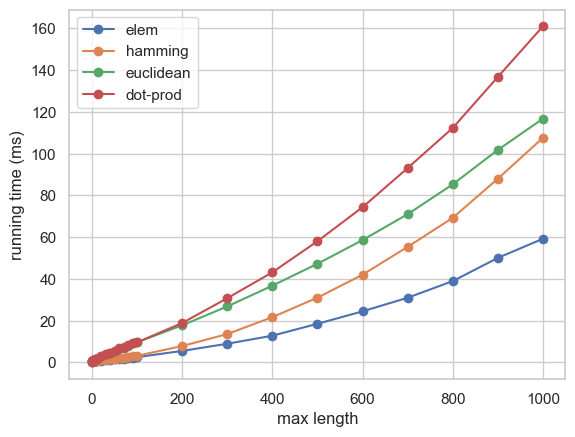

In [18]:
stats['emp'].plot.line(xlabel='max length', ylabel=driver_labels['emp'], marker='o')
plt.savefig('figs/list-emp-1.pdf')

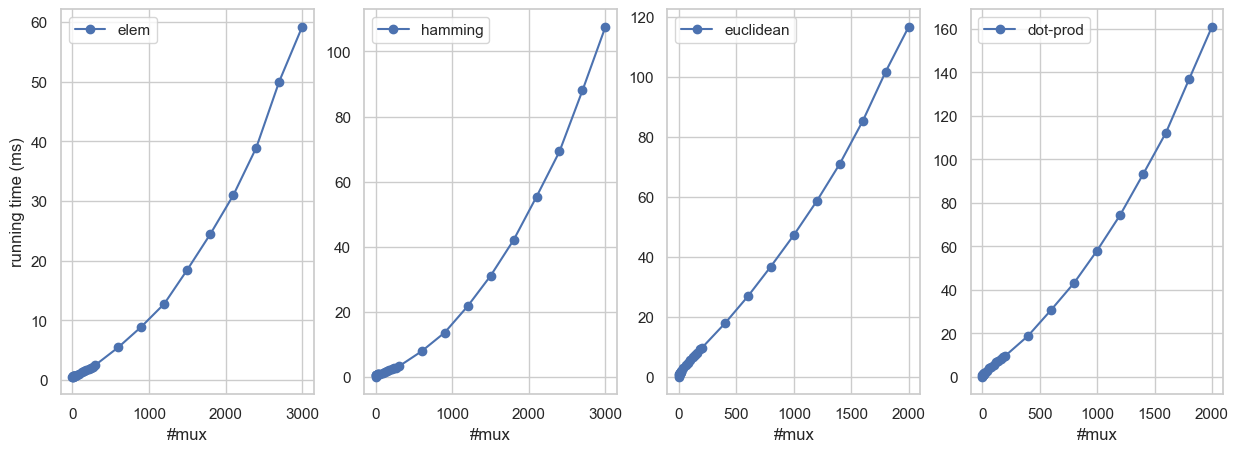

In [19]:
fig, ax = plt.subplots(ncols=len(tests), figsize=(15,5))
ax[0].set_ylabel(driver_labels['emp'])
if 'list' not in corrs: corrs['list'] = {}
for i, tst in enumerate(tests.values()):
    df = pd.DataFrame(data={'#mux':stats['plaintext'][tst], tst:stats['emp'][tst]})
    corrs['list'][tst] = df.corr().iat[0, 1]
    df.plot.line(ax=ax[i], x='#mux', y=tst, xlabel=driver_labels['plaintext'], marker='o')

plt.savefig('figs/list-mux-corr-1.pdf')

In [20]:
tests = {'insert':'insert', 'filter':'filter', 'map':'map'}

stats = {}
for dr in drivers:
    stats[dr] = pd.concat((read_stats('list', dr, v, n, index_col='public') for (v, n) in tests.items()))

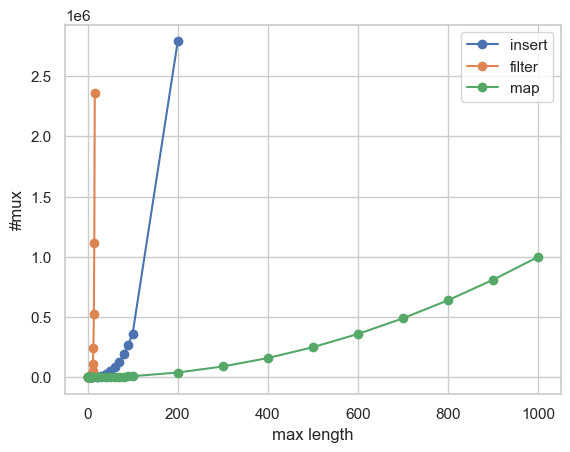

In [21]:
stats['plaintext'].plot.line(xlabel='max length', ylabel=driver_labels['plaintext'], marker='o')
plt.savefig('figs/list-plaintext-2.pdf')

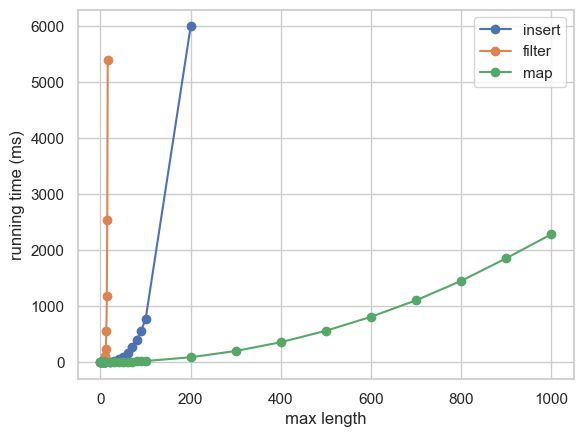

In [22]:
stats['emp'].plot.line(xlabel='max length', ylabel=driver_labels['emp'], marker='o')
plt.savefig('figs/list-emp-2.pdf')

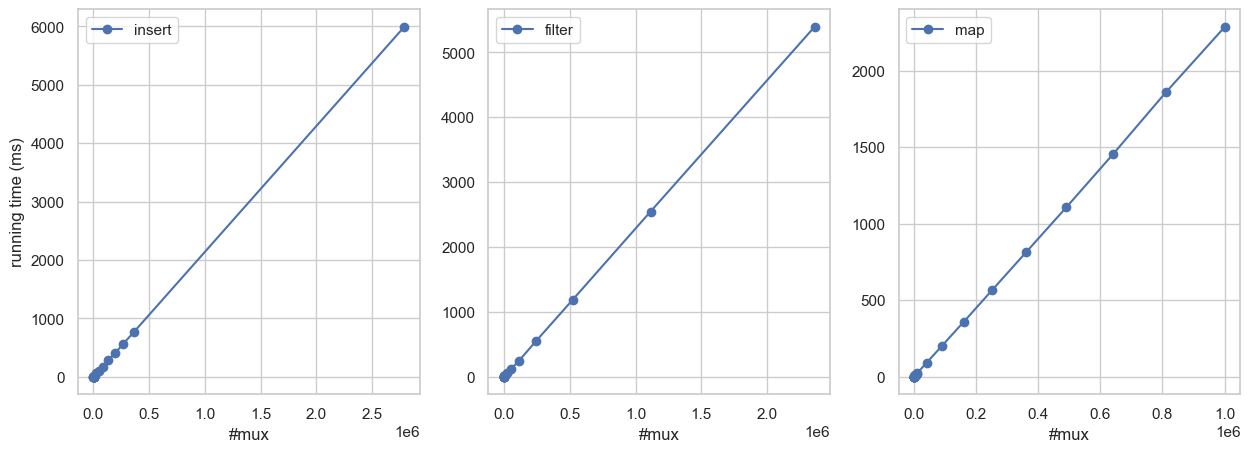

In [23]:
fig, ax = plt.subplots(ncols=len(tests), figsize=(15,5))
ax[0].set_ylabel(driver_labels['emp'])
if 'list' not in corrs: corrs['list'] = {}
for i, tst in enumerate(tests.values()):
    df = pd.DataFrame(data={'#mux':stats['plaintext'][tst], tst:stats['emp'][tst]})
    corrs['list'][tst] = df.corr().iat[0, 1]
    df.plot.line(ax=ax[i], x='#mux', y=tst, xlabel=driver_labels['plaintext'], marker='o')

plt.savefig('figs/list-mux-corr-2.pdf')

In [24]:
cats = ['list', 'tree']
df = pd.concat((pd.DataFrame(data=corrs[c], index=['correlation']).T for c in cats), keys=cats)
df

correlation
list elem          0.978766
     hamming       0.974828
     euclidean     0.995305
     dot-prod      0.989952
     insert        0.999994
     filter        0.999993
     map           0.999978
tree lookup        0.999917
     prob          0.999993
     map           0.999992

In [25]:
df.style.to_latex('figs/mux-corr.tex')

In [ ]:
# Done!